In [7]:
import pandas as pd
df=pd.read_csv("final_dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,1,49,No,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,2,37,Yes,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,3,33,No,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,4,27,No,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [29]:
scalar = StandardScaler()
  
# fitting
new_df= df.drop(columns=["Department","Attrition","Education","EducationField","EnvironmentSatisfaction","Gender","EmployeeNumber","JobLevel","JobRole","JobSatisfaction","MaritalStatus","OverTime", "PerformanceRating",  "RelationshipSatisfaction", "StockOptionLevel", "TrainingTimesLastYear",  "WorkLifeBalance" ],axis=1)
scalar.fit(new_df)
scaled_data = scalar.transform(new_df)
  
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 3
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
x_pca.shape

(1470, 2)

Text(0, 0.5, 'Second Principal Component')

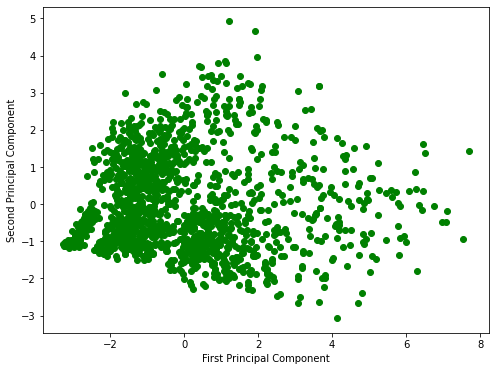

In [30]:
# giving a larger plot
plt.figure(figsize =(8, 6))
q=list()

for i in df["Attrition"]:
  if i == "Yes": 
    x = "blue" 
  elif i=="No": 
    x="Green" 

q.append(x)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c= q)
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [31]:

# components
pca.components_

array([[-0.00960823,  0.28029032,  0.00466691, -0.00098298,  0.3606581 ,
         0.0309354 , -0.01530816,  0.41534736,  0.44348857,  0.39140316,
         0.34428656,  0.38617542],
       [-0.01001084,  0.47977398, -0.05532559,  0.02442767,  0.29415337,
         0.56507558, -0.00790963,  0.32117239, -0.21446382, -0.28580132,
        -0.20147244, -0.29789249]])

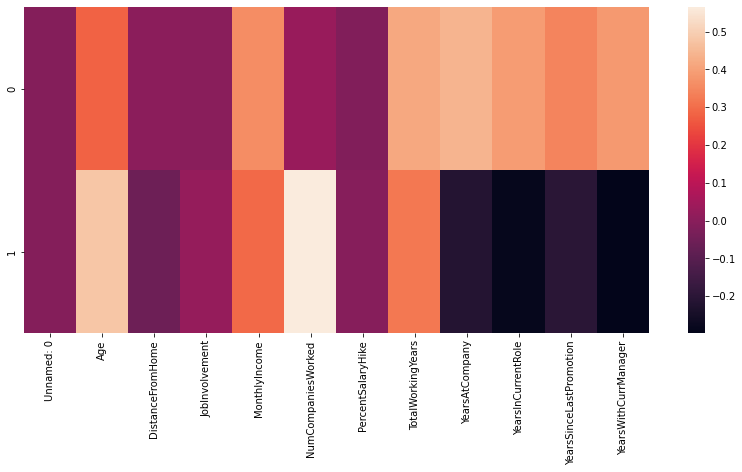

In [33]:
df_comp = pd.DataFrame(pca.components_, columns = new_df.columns)
  
plt.figure(figsize =(14, 6))
  
# plotting heatmap
sns.heatmap(df_comp)